# Libraries for scientific computing and data analysis

## NumPy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional **array** object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np   # the pseudonym np is widely used

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the **rank** of the array; the **shape** of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists (lists of lists), and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b.shape)
print(b)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


## SciPy and Scikit-learn

**SciPy** is the reference Python library for scientific computing, technical computing and statistics.
It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

**Scikit-learn** (aka sklearn) is the most known library for machine learning in Python.
It features various classification, regression and clustering algorithms including:
- support-vector machines
- random forests
- gradient boosting
- k-means
- DBSCAN

It is designed to interoperate with both NumPy and SciPy.

## Matplotlib

Matplotlib is a plotting library.

In particular, we will focus on the `matplotlib.pyplot` module.

In [5]:
import matplotlib.pyplot as plt

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data.
`plot` wants two vectors of identical length that respectively contain the x-coordinates and the y-coordinates of a set of points in the plane.
`plot` automatically joins these points with a curve.

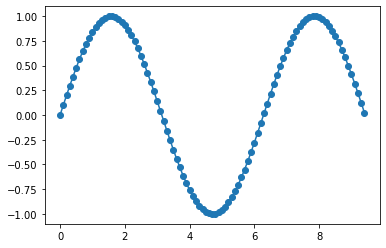

In [6]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)  # apply a function to all x-coordinates to obtain the y-coordinates

# Plot the points using matplotlib
plt.plot(x, y)
plt.scatter(x,y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

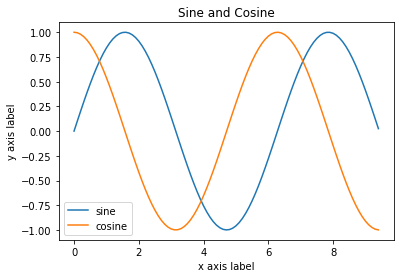

In [7]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='sine')
plt.plot(x, y_cos, label='cosine')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend()
plt.savefig('sine_and_cosine.png')

## Pandas

The pandas package is the backbone of most data science projects in Python.
It is based on the concept of **DataFrame**, a two-dimensional data structure where data is aligned in a tabular fashion in rows and columns.
Pandas' DataFrames implement many functions that allow you to "easily" clean, transform and analyze your data.

For instance, you can:
- Calculate statistics and answer questions about the data, like
    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C looks like?

- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria

- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 

- Store the cleaned, transformed data back into a CSV, other file or database

We will see pandas in action in the following lectures. For the moment, let us introduce its main data structures and see how data can be read and written.

To use Pandas you first need to import it:

In [8]:
import pandas as pd

In [9]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


### Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="series-and-dataframe.png" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

### Creating DataFrames from scratch

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let us say we have a fruit stand that sells apples and oranges.
We have had 4 customers who purchased apples and oranges as follows:

In [10]:
my_purchases = {'June':{'apples':3}, # this customer did not buy any oranges
             'Robert':{'apples':2, 'oranges':3},
             'Lily':{'oranges':7},
             'David':{'oranges':2, 'apples':1}}

In [11]:
my_purchases

{'June': {'apples': 3},
 'Robert': {'apples': 2, 'oranges': 3},
 'Lily': {'oranges': 7},
 'David': {'oranges': 2, 'apples': 1}}

In [12]:
my_purchases['June']

{'apples': 3}

In [13]:
my_purchases['June']['apples']

3

We want a table with a column for each fruit and a row for each customer purchase.
We first reorganize the dictionary of purchases as follows:

In [14]:
reorganized_purchases = {'apples':[], 'oranges':[]}
for customer,purchase in my_purchases.items():
    for fruit in reorganized_purchases.keys():
        quantity = purchase.get(fruit,0) # this returns 0 if that key is not in purchase
        reorganized_purchases[fruit].append(quantity)
print(reorganized_purchases)

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}


And then pass it to the pandas DataFrame constructor:

In [15]:
purchases = pd.DataFrame(reorganized_purchases)

purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

In [16]:
purchases.index = ['A','B','C','D']

In [17]:
purchases

apples  oranges
A       3        0
B       2        3
C       0        7
D       1        2

In [18]:
purchases['name'] = my_purchases.keys()
purchases

apples  oranges    name
A       3        0    June
B       2        3  Robert
C       0        7    Lily
D       1        2   David

In [19]:
purchases.to_csv('my_purchases.csv')

In [20]:
!cat my_purchases.csv

,apples,oranges,name
A,3,0,June
B,2,3,Robert
C,0,7,Lily
D,1,2,David


The **Index** of this DataFrame is by default the integer range 0-3, but we can specify that we want to use our customer names: 

In [21]:
purchases = pd.DataFrame(reorganized_purchases, index=my_purchases.keys())

purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [22]:
purchases['oranges'].max()

7

In [23]:
purchases['oranges'].argmax()

2

In [24]:
purchases.index[2]

'Lily'

In [25]:
purchases['oranges'].idxmax()

'Lily'

In [26]:
purchases.iloc[purchases['oranges'].argmax()]

apples     0
oranges    7
Name: Lily, dtype: int64

To **locate** a customer's purchase we can use the `loc` or `iloc` methods:

In [27]:
purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [28]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [29]:
purchases.iloc[2]

apples     0
oranges    7
Name: Lily, dtype: int64

### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [30]:
df = pd.read_csv('purchases.csv')

df

Unnamed: 0  apples  oranges
0       June       3        0
1     Robert       2        3
2       Lily       0        7
3      David       1        2

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [31]:
df = pd.read_csv('purchases.csv', index_col=0)

df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

You can write the CSV back like this:

In [32]:
df.to_csv('new_purchases.csv')

### Reading data from JSON

A JSON file is essentially a stored Python `dict`:

In [33]:
!cat purchases.json

{"apples":{"June":3,"Robert":2,"Lily":0,"David":1},"oranges":{"June":0,"Robert":3,"Lily":7,"David":2}}

You can read it equally easily:

In [34]:
df = pd.read_json('purchases.json')

df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

Pandas will try to figure out how to create a DataFrame by analyzing the structure of your JSON.

Be careful: it might not get it right!

You can write the JSON back like this:

In [35]:
df.to_json('new_purchases.json')

_____________________
_____________________

# Exploratory Data Analysis (EDA)

## What is EDA?

*“Exploratory data analysis” is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.* — John Tukey

* John Tukey, a mathematician at Bell Labs, developed exploratory data analysis in contrast to confirmatory data analysis, which concerns itself with modeling and hypotheses.

> In EDA, there is no hypothesis and there is no model. The “exploratory” aspect means that your understanding of the problem you are solving, or might solve, is changing as you go.



* The basic tools of EDA are **plots**, **graphs** and **summary statistics**. 

* EDA is a method of systematically going through the data, ***plotting distributions*** of all variables (using box plots), plotting time series of data, transforming variables, ***looking at all pairwise relationships*** between variables using scatterplot matrices, and ***generating summary statistics*** for all of them. 

* At the very least that would mean computing their mean, minimum, maximum, the upper and lower quartiles, and identifying outliers.

> You want to **understand the data** — gain intuition, understand the shape of it, and try to connect your understanding of the process that generated the data to the data itself.

There are important reasons anyone working with data should do EDA:

* to gain intuition about the data; 

* to make comparisons between distributions; 

* for **sanity checking** (making sure the data is on the scale you expect, in the format you thought it should be); 

* to find out where data is **missing** or if there are **outliers**; 

* to **summarize** the data.

To illustrate what EDA means in practice, let us consider the following analysis of the scores obtained by 30 students at an exam.

We first load and visualize the data:

In [36]:
!cat scores.csv

id,hours,score
194495,0.5,16.620516833510955
192949,0.9,19.861295082173005
198095,1.2,18.88739334682668
182192,2.6,16.230041898446753
188512,3.4,19.311403181113004
182569,3.5,18.91587315923822
194398,3.6,19.843227602786776
196597,3.7,21.675922642719584
204071,4.0,19.066709490403692
195170,4.1,20.670995264438513
208783,4.2,19.871047304889533
188250,4.3,23.971143075983775
183032,4.6,21.2700230375691
185115,5.0,20.699563035423388
192755,5.0,22.138052134179503
188119,5.3,21.831793780188583
200254,5.4,23.915344580701415
192443,5.5,25.700284501274492
200727,5.6,26.836552870179567
187576,6.3,22.607181728418134
183873,7.4,25.913126393657883
180104,7.6,26.521856745901793
209900,7.7,23.668581987553992
207090,7.9,27.03176444989888
196190,8.6,28.155629169342514
206551,8.8,29.02206316654748
195281,9.2,25.265342605309296
180749,9.4,27.15204770338443
192775,9.6,26.522625472407896
190079,9.8,26.033770851880874


In [37]:
data = pd.read_csv('scores.csv')
data

id  hours      score
0   194495    0.5  16.620517
1   192949    0.9  19.861295
2   198095    1.2  18.887393
3   182192    2.6  16.230042
4   188512    3.4  19.311403
5   182569    3.5  18.915873
6   194398    3.6  19.843228
7   196597    3.7  21.675923
8   204071    4.0  19.066709
9   195170    4.1  20.670995
10  208783    4.2  19.871047
11  188250    4.3  23.971143
12  183032    4.6  21.270023
13  185115    5.0  20.699563
14  192755    5.0  22.138052
15  188119    5.3  21.831794
16  200254    5.4  23.915345
17  192443    5.5  25.700285
18  200727    5.6  26.836553
19  187576    6.3  22.607182
20  183873    7.4  25.913126
21  180104    7.6  26.521857
22  209900    7.7  23.668582
23  207090    7.9  27.031764
24  196190    8.6  28.155629
25  206551    8.8  29.022063
26  195281    9.2  25.265343
27  180749    9.4  27.152048
28  192775    9.6  26.522625
29  190079    9.8  26.033771

First, we might want to check if the scores follow a Gaussian distribution:

Text(0.5, 1.0, 'Fit results: mu = 22.84,  std = 3.48')

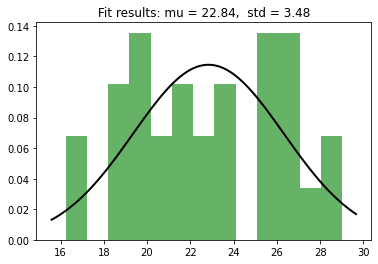

In [38]:
import matplotlib.pyplot as plt
# import the class norm (normal distribution)
from scipy.stats import norm
# find the normal distribution that best fits our scores 
mu, std = norm.fit(data['score'])
# plot the histogram of our scores
plt.hist(data['score'], bins=int(data['score'].max()-data['score'].min())+1, density=True, alpha=0.6, color='g')
# plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = norm.pdf(x, mu, std)  # get the pdf for all values in the range
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)

The histogram does not look Gaussian. Let us try with a Gaussian KDE (a linear combination of Gaussians):

Text(0.5, 1.0, 'Fit with KDE')

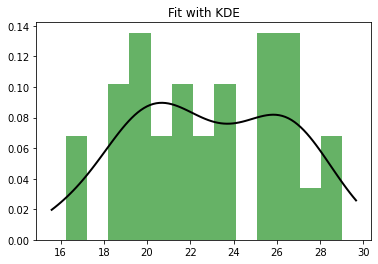

In [39]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(data['score'])  # fit the KDE
# plot the histogram of our scores
plt.hist(data['score'], bins=int(data['score'].max()-data['score'].min())+1, density=True, alpha=0.6, color='g')
# plot the PDF of the fitted KDE
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = kde(x)  # get the pdf for all values in the range
plt.plot(x, p, 'k', linewidth=2)
title = "Fit with KDE"
plt.title(title)

The fact that this KDE works better than a simple Gaussian fit tells us that **the students can be (broadly) divided in two groups**.

Our dataset also includes the number of hours each student spent studying for this exam.
Let us verify whether the exam score grows linearly with the number of studying hours.

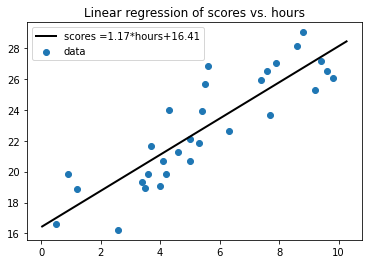

In [40]:
# import the class LinearRegression that allows to fit the data with a linear model 
from sklearn.linear_model import LinearRegression
# fit the linear model to the data (it wants a rank 2 array as first argument)
lr = LinearRegression().fit(data['hours'].to_numpy().reshape(-1,1),data['score'])
# plot the data
plt.scatter(data['hours'],data['score'], label='data')
# plot the linear regression
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = lr.predict(x.reshape(-1,1))  # get the predicted score for all values in the range
m, q = lr.coef_[0], lr.intercept_  # extract the coefficients of the liner regression
plt.plot(x, p, 'k', linewidth=2, label=f'scores ={m:.2f}*hours+{q:.2f}')
title = "Linear regression of scores vs. hours"
plt.title(title)
plt.legend()

It looks like studying actually helps.

---
---

# **Case Study: Retail Store**


The original dataset is available [here](https://www.kaggle.com/datasets/marian447/retail-store-sales-transactions), we are going to use a slightly modified version of it.

**About the dataset**

Detailed data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. The data provide detailed information about quantities, characteristics and values of goods sold as well as their prices.

The anonymized dataset includes 64.682 transactions of 5.242 "Stock Keeping Units" (SKUs) sold to 22.625 customers during one year.

**Dataset Description**

1. Date of Sales Transaction
2. Customer ID
3. Transaction ID
4. SKU Category ID
5. SKU ID
6. Quantity Sold
7. Sales Amount (Unit price times quantity. For unit price, please divide Sales Amount by Quantity.)
8. Hour
9. Transaction Type (Credit card or cash)
10. Branch Name

**Data Format**

The dataset is stored in a CSV file, that is data are organized in rows and columns. CSV stays for "Comma Separated Values": each columns is separated by a comma and each row is separated by a newline character.

### **The Dataset**

* **Q1:** How is the CSV file formatted?

* **Q2:** How are columns and rows organized in the file?

In [41]:
# Let's have a look at the dataset, that is the CSV file we got.
#
# Before deciding how to import data and work with them, we take a 
# first look to the dataset by printing the first lines of the file.
#
# Once we have an idea of the content we can decide how to import it.

N = 5
with open("Retail_Store.csv", "r") as f:
    for i in range(N):
        line = f.readline().strip()
        print(line)

# ** NOTE **
# 
# The strip() method removes any leading (spaces at the beginning) 
# and trailing (spaces at the end) characters (space is the default 
# leading character to remove). The new line character is considered 
# a space character, thus it is removed.
# 
# Syntax
#
#   string.strip(characters)
#
# ** NOTE **


,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store
4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,16,Cash,Circleville Store


### **Importing Data**

* **Q1:** How do we import the dataset in our notebook? Do you have any suggestion?

* **Q2:** How many columns does the CSV file contain?

* **Q3:** How many columns do we expect to find in our dataset?












In [42]:
import pandas as pd

In [43]:
#
# * We can use pandas to import our dataset.
#
# * The CSV file contains 11 columns, but our dataset is supposed to have only 10 columns.
#   The first column is actually the row id.  
#

# The columns in the CSV file are:
#
#     ,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
#
# What is the name of the first column?
#
#
# We can override the header (header=0) and specify the name of each column
#

df = pd.read_csv("Retail_Store.csv", 
                 names=[ "Row_ID", "Date", "Customer_ID", "Transaction_ID", 
                         "SKU_Category", "SKU", "Quantity", "Sales_Amount", 
                         "Hour", "Transaction_Type", "Branch_Name" ], 
                 header=0)
df.head(3)

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0       1  02/01/2016         2547               1          X52  0EM7L   
1       2  02/01/2016          822               2          2ML  68BRQ   
2       3  02/01/2016         3686               3          0H2  CZUZX   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store

### **Or we use the header of the CSV file**

In [44]:
# The header of the CSV file does not contain the name of the first column, the field is empty.
# If we use the header of the file to import the dataset, we get the following dataframe.

df = pd.read_csv("Retail_Store.csv")
df.head(3)

#
# pandase named as "Unnamed: 0" the first column because the field was empty
#

Unnamed: 0        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0           1  02/01/2016         2547               1          X52  0EM7L   
1           2  02/01/2016          822               2          2ML  68BRQ   
2           3  02/01/2016         3686               3          0H2  CZUZX   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store

In [45]:
# We can rename the "Unnamed: 0" column

df.rename(columns={"Unnamed: 0": "Row_ID"}, inplace=True)

# Finally we have our dataset ready to be processed 

df.head()

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0       1  02/01/2016         2547               1          X52  0EM7L   
1       2  02/01/2016          822               2          2ML  68BRQ   
2       3  02/01/2016         3686               3          0H2  CZUZX   
3       4  02/01/2016         3719               4          0H2  549KK   
4       5  02/01/2016         9200               5          0H2  K8EHH   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store  
3       1.0          5.59    16             Cash  Circleville Store  
4       1.0          6.88    17             Cash  Circleville Store

In [46]:
df.shape

(131708, 11)

## Cleaning data with Pandas

Before any analysis, we need to make sure that the dataset is sufficiently *clean*.


### Missing Values

In [47]:
# Null values

df.isna().sum()

# ** NOTE ** 
#
# isna()
#     Return a boolean same-sized object indicating if the values are NA. 
#     NA values gets mapped to True values.
#
#     The result of isna() is a dataframe in which each cell contains 
#     values True or False.
#
# ** NOTE **

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    1
Branch_Name         0
dtype: int64

#### The dataframe has 1 missing value in the *Transaction_Type* column.

* **Q1:** How do we locate the cell containing the missing value?

In [48]:
#
# We select all rows containing a NA value. 
#

df[ df['Transaction_Type'].isna() ]

# We can use the following command to obtain the same result
#
# df[df.isna().any(axis=1)]
#
# ** NOTE ** 
#
# any()
#     Return whether any element is True, potentially over an axis.
#
#     axis=1
#         Indicate which axis or axes should be reduced.
#         0 / ‘index’   : reduce the index, return a Series whose 
#         index is the original column labels.
#         1 / ‘columns’ : reduce the columns, return a Series whose 
#         index is the original index.
#
#     We set axis=1 to get the result for each row.    
#
# ** NOTE **
#

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
20      19  02/01/2016         6453              14          N8U  4A2M0   

    Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
20       1.0          7.02     8              NaN  Circleville Store

The coordinates of the cell are:
- row: 20
- column: Transaction_Type

In [49]:
#
# We modify the value of the cell containing the missing value.
#     row:     20
#     column:  Transaction_Type
#

print( f"Before the update: {df.loc[20, 'Transaction_Type']}" )

df.loc[20, 'Transaction_Type'] = 'Cash'

print( f"After the update: {df.loc[20, 'Transaction_Type']}" )

Before the update: nan
After the update: Cash


In [50]:
# Null values

df.isna().sum()

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    0
Branch_Name         0
dtype: int64

There are no missing values in the dataframe.

### Duplicated Rows

In [51]:
# Duplicated rows

df.duplicated().sum()

1

#### The dataframe has 1 duplicated row.

* **Q1:** How do we locate the duplicated row?

In [52]:
#
# We select all duplicated rows
#

df[ df.duplicated() ]

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
19      19  02/01/2016         6450              14          N8U  4A2M0   

    Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
19       1.0          7.02     8             Cash  Circleville Store

In [53]:
# We remove the duplicated rows

df.drop([19], axis=0, inplace=True )

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

In [54]:
# Duplicated rows

df.duplicated().sum()

0

The dataframe has no duplicated rows or missing values.


### **Rows and Columns**

* **Q1:** How many rows and columns does the dataframe have?

In [55]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 11)

Rows: 131707
Columns: 11


### **Cleaning Up**

* **Q1:** Do we need all columns? 

* **Q2:** There are columns that we can drop?

In [56]:
list(df.columns)

['Row_ID',
 'Date',
 'Customer_ID',
 'Transaction_ID',
 'SKU_Category',
 'SKU',
 'Quantity',
 'Sales_Amount',
 'Hour',
 'Transaction_Type',
 'Branch_Name']

* **Q1:** How many different values does the column 'Branch_Name' contains?

In [57]:
df['Quantity'].nunique()


83

In [58]:
df['Branch_Name'].nunique()

# ** NOTE **
#
# DataFrame.nunique()
#   Count number of distinct elements in specified axis
#
# ** NOTE **

1

We have only one Branch.

* **Q1:** Does the column contain useful data for the analysis? Why?

In [59]:
#
# We drop 'Row_ID' and 'Branch_Name'
#

df.drop(['Row_ID','Branch_Name'], axis=1, inplace=True)

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

In [60]:
df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0  02/01/2016         2547               1          X52  0EM7L       1.0   
1  02/01/2016          822               2          2ML  68BRQ       1.0   
2  02/01/2016         3686               3          0H2  CZUZX       1.0   
3  02/01/2016         3719               4          0H2  549KK       1.0   
4  02/01/2016         9200               5          0H2  K8EHH       1.0   

   Sales_Amount  Hour Transaction_Type  
0          3.13    11             Card  
1          5.46    18             Card  
2          6.35    17             Card  
3          5.59    16             Cash  
4          6.88    17             Cash

In [61]:
df.shape

(131707, 9)

In [62]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 9)

Rows: 131707
Columns: 9


### **Checking Dataset**

There are few constraints that must hold:

* **Transaction & Customer:** For each transation ('Transaction_ID') we have only one customer ('Customer_ID')

* **Transaction & Hour:** For each transcation ('Transaction_ID') we have only one hour ('Hour')

* **Transaction & Transaction Type:** For each transcation ('Transaction_ID') we have only one transaction type ('Transaction Type')

* **Transaction & Date:** For each transcation ('Transaction_ID') we have only one date ('Date')

#### **Q1:** How do we check if the constraints hold?

In [63]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
18  02/01/2016         6450              14          N8U  4A2M0       1.0   
20  02/01/2016         6453              14          N8U  4A2M0       1.0   

    Sales_Amount  Hour Transaction_Type  
18          7.02     8             Cash  
20          7.02     8             Cash

In [64]:
df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique')

0         1
1         1
2         1
3         1
4         1
         ..
131703    1
131704    1
131705    1
131706    1
131707    1
Name: Customer_ID, Length: 131707, dtype: int64

* We found a transaction assigned to two different customers!

    * We should modify the dataframe to correct the data.

In [65]:
# If we assign the same Customer_ID to both rows we create 
# a duplicate. We remove the second row.

df.drop([20], axis=0, inplace=True)

In [66]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

The dataframe is empty, thus we do not have multiple customers associeted with the same transaction.

In [67]:
# Let's understand the meaning of the following code.
#
# ---> df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]
#

# 1. We create groups of rows based on the value of 'Transaction_ID'

transactionCustomer = df.groupby(["Transaction_ID"])

#    In the following we show the groups: the dictionary contains 
#    the group name and the list of rows beloging to it.
#    { group_name: [row_1, row_2, ...], ... } 

transactionCustomer.groups

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 7: [6, 7], 8: [8], 9: [9, 10], 10: [11, 12], 11: [13], 12: [14, 15], 13: [16, 17], 14: [18], 15: [21, 22], 16: [23, 24], 17: [25, 26], 18: [27], 19: [28, 29, 30], 20: [31], 21: [32, 33], 22: [34], 23: [35, 36, 37, 38], 24: [39], 25: [40, 41, 42], 26: [43, 44], 27: [45], 28: [46], 29: [47], 30: [48], 31: [49, 50], 32: [51], 33: [52], 34: [53, 54], 35: [55, 56], 36: [57, 58], 37: [59, 60], 38: [61], 39: [62, 63, 64], 40: [65, 66, 67], 41: [68], 42: [69], 43: [70], 44: [71], 45: [72], 46: [73, 74], 47: [75, 76, 77], 48: [78, 79, 80], 49: [81], 50: [82], 51: [83], 52: [84], 53: [85], 54: [86, 87], 55: [88, 89, 90, 91], 56: [92], 57: [93, 94], 58: [95, 96], 59: [97], 60: [98], 61: [99], 62: [100], 63: [101, 102, 103, 104, 105], 64: [106, 107, 108, 109], 65: [110, 111, 112], 66: [113, 114, 115], 67: [116], 68: [117, 118], 69: [119], 70: [120], 71: [121, 122], 72: [123], 73: [124], 74: [125], 75: [126], 76: [127, 128, 129, 130, 131, 132, 133, 1

In [68]:
# Let's see which are the rows inside group 7.

transactionCustomer.get_group(7)

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
6  02/01/2016         1666               7          XG4  AHAE7       1.0   
7  02/01/2016         1666               7          FEW  AHZNS       1.0   

   Sales_Amount  Hour Transaction_Type  
6          3.65    17             Card  
7          8.21    17             Card

In [69]:
# 2. We count the number of unique Customer_ID inside each group.
#
#    If the constraint 1 Transaction 1 Customer holds, we should have 
#    a unique Customer_ID in each group, i.e. all Customer_ID in a group 
#    should coincide, or we can say that all Customer_ID in a group are duplicates.    

# ** NOTE **
#
#    transform(func)
#        The transform method applies the function func to each group.
#
# ** NOTE **

#    With gt() we check which group has more than 1 unique value, i.e.
#    more than a single customer associeted to the transaction.

transactionCustomer["Customer_ID"].transform('nunique').gt(1)


0         False
1         False
2         False
3         False
4         False
          ...  
131703    False
131704    False
131705    False
131706    False
131707    False
Name: Customer_ID, Length: 131706, dtype: bool

In [70]:
# 3. Finally we use our condition to select the row of the dataframe

df[ transactionCustomer["Customer_ID"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

An empty dataframe means that there are no groups with different rows, or multiple customers associated with the same transaction.

To verify all other constraints we can apply the same procedure.

In [71]:
# Transaction & Hour

df[ df.groupby(["Transaction_ID"])["Hour"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

In [72]:
# Transaction & Transaction Type

df[ df.groupby(["Transaction_ID"])["Transaction_Type"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

In [73]:
# Transaction & Date

df[ df.groupby(["Transaction_ID"])["Date"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

________________________________________________
________________________________________________

## EDA

We already loaded and cleaned the data. We now start analyzing them.

### Grouping ##

One thing that you often need to do is group all records that have the same value in a specific column:

In [74]:
# We create groups of records (rows) based on the value of 'Customer_ID'

customer_groups = df.groupby(['Customer_ID'])

#    In the following we show the groups: the dictionary contains 
#    the group name and the list of row indices beloging to it.
#    { group_name: [row_1, row_2, ...], ... } 

customer_groups.groups

{1: [7286, 7287], 2: [29174, 61446], 3: [156, 157, 158], 4: [68806, 111165, 111166, 111167, 111168], 5: [13261, 17914, 29093, 53729, 66664], 6: [31229, 31230, 31231], 7: [97643], 8: [61908], 9: [27483], 10: [14357], 11: [9300], 12: [1713], 13: [2931, 13935, 13936], 14: [5792, 16560, 16561, 16562, 18559, 18560, 18561, 26572], 15: [2365], 16: [5693, 37956], 17: [1184, 1185, 2610], 18: [6367], 19: [35892, 35893], 20: [2456, 15065, 17237, 21745], 21: [27414], 22: [4568], 23: [91866], 24: [6118, 14466, 14467, 14468], 25: [7180, 18880, 18881], 26: [4812, 4813, 4814, 4815, 4816, 11704, 11705, 11706, 11707, 22390, 22391, 31761], 27: [82742, 82743], 28: [7576, 7577], 29: [33824], 30: [17509, 17510, 17511, 17512, 17513, 37601, 37602, 37603], 31: [27928, 27929], 32: [30665, 40038], 33: [12900, 30292, 30293, 30294, 30295, 30296], 34: [28419], 35: [7947], 36: [36082, 36083, 36084, 36085, 36086], 37: [10224], 38: [65769, 65775], 39: [2005], 40: [11372, 11373, 11374, 11375, 11376, 11377, 11378, 11379

In [75]:
# select a specific customer
customer_groups.get_group(17470)

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
25353   15/03/2016        17470           12293          P42  YJ0Q7       1.0   
25354   15/03/2016        17470           12293          R6E  DUV2Y       1.0   
29732   25/03/2016        17470           14479          N8U  COWU2       1.0   
37648   17/04/2016        17470           18508          8HU  1LEE7       2.0   
37649   17/04/2016        17470           18508          0H2  BGRWC       1.0   
...            ...          ...             ...          ...    ...       ...   
117639  26/11/2016        17470           57831          P42  41AOW       1.0   
125142  14/12/2016        17470           61414          A38  TGDAD       2.0   
130621  28/12/2016        17470           64102          J4R  A9P11       1.0   
130622  28/12/2016        17470           64102          8HU  1LEE7       1.0   
130623  28/12/2016        17470           64102          8HU  I44Y5       2.0   

        Sales_Amount  Hour Transaction_Type  
25353           8.32    11             Card  
25354           8.00    11             Card  
29732           3.82    14             Card  
37648           5.93    13             Cash  
37649           7.50    13             Cash  
...              ...   ...              ...  
117639          6.82    11             Card  
125142         42.16    16             Card  
130621          6.92    16             Cash  
130622          2.96    16             Cash  
130623         10.10    16             Cash  

[61 rows x 9 columns]

In [76]:
# get the total number of items bought by each customer
customer_groups['Quantity'].sum()

Customer_ID
1         2.0
2         2.0
3         4.0
4         5.0
5        14.0
         ... 
22621     3.0
22622     1.0
22623     3.0
22624     2.0
22625    10.0
Name: Quantity, Length: 22625, dtype: float64

In [77]:
# find the customer that bought the most (in total) and how many items they bought
c_id = (customer_groups['Quantity'].sum()).idxmax()
tot_bought = customer_groups.get_group(c_id)['Quantity'].sum()
print(f'customer: {c_id}, number bought: {tot_bought}')

customer: 17471, number bought: 814.9


## Basic statistics ##

### **Transaction Types**

* **Q1:** Which is the payment method preferred by our customers?

* **Q2:** How do we retrieve this information from our dataframe?

In [78]:
t_types = df['Transaction_Type'].value_counts()

# ** NOTE **
# 
# value_counts()
#
#     Return a Series containing counts of unique values.
#
# ** NOTE **

t_types

Card    84905
Cash    46801
Name: Transaction_Type, dtype: int64

* **Q1:** How do we visualize this information?

<ipython-input-79-5a834defdb88>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


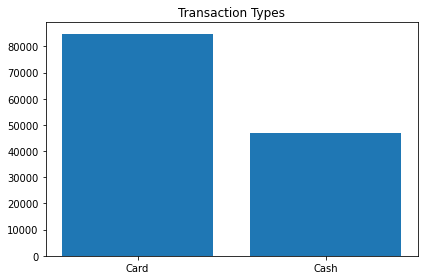

In [79]:
# We plot the result

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.bar(x=t_types.index.tolist(), height=t_types.tolist())
ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Is the chart informative? 

* **Q2:** Can we do better?

<ipython-input-80-261222b1f1d0>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[64.46555206292803, 35.53444793707196]


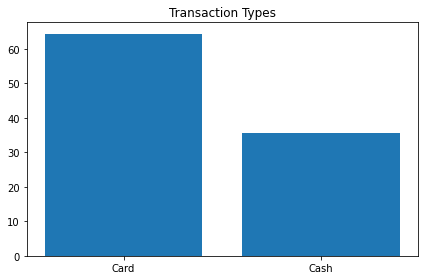

In [80]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

bars = ax.bar(t_types.index.tolist(), percentage)

ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Did we do the right thing?

* **Q2:** Do we need to group data somehow before counting?


In [81]:
#
# Group by "Transaction_ID"
#

t_types = df.groupby(["Transaction_ID"]).agg({'Transaction_Type':'first'})['Transaction_Type'].value_counts()


[64.68105500757552, 35.31894499242448]


<ipython-input-82-1f003e8e5ce4>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


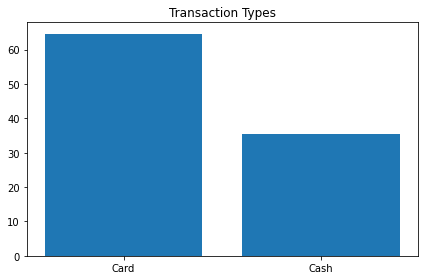

In [82]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

ax.bar(x=t_types.index.tolist(), height=percentage)
ax.set_title("Transaction Types") # Add a title to the axes.
fig.tight_layout()
fig.show()

#### To get the right result we must group data by Transaction_ID

Values are very close 

* Without **groupby** 
    * [64.46555206292803, 35.53444793707196]

* With **groupby**
    * [64.68105500757552, 35.31894499242448]

